In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline


In [2]:
import keras.backend.tensorflow_backend as KTF
import tensorflow as tf
config = tf.ConfigProto()  
config.gpu_options.allow_growth=True   
session = tf.Session(config=config)
KTF.set_session(session)

Using TensorFlow backend.


In [3]:
import keras 
from models.psenet import psenet

In [4]:
shape = (None,None,3)

In [5]:
inputs = keras.layers.Input(shape=shape)
output = psenet(inputs)
model  = keras.models.Model(inputs,output)
model.summary()

C:\Program Files\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           lambda_1[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        conv1_pad[0][0]           

In [6]:
from keras.optimizers import Adam
from models.loss import build_loss
from models.metrics import build_iou,mean_iou
from keras.utils import multi_gpu_model

In [7]:
parallel_model = multi_gpu_model(model)

(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)
(None, None)


In [8]:
adam = Adam(1e-4)

In [9]:
ious = build_iou([0,1],['bk','txt'])

In [10]:
parallel_model.compile(loss=build_loss,
              optimizer=adam,
              metrics=ious)

In [11]:
import config 
from tool.generator import Generator

In [12]:
train_dir = config.MIWI_2018_TRAIN_LABEL_DIR
test_dir = config.MIWI_2018_TEST_LABEL_DIR
batch_size = 4
num_class =2 
shape = (640,640)

In [13]:
gen_train = Generator(train_dir,batch_size = batch_size ,istraining=True,num_classes=num_class,mirror = False,reshape=shape)

In [14]:
gen_test = Generator(test_dir,batch_size = batch_size ,istraining=False,num_classes=num_class,
                     reshape=shape,mirror=False,scale=False,clip=False,trans_color=False)

In [15]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
checkpoint = ModelCheckpoint(r'resent50-190227_BLINEAR-{epoch:02d}.hdf5',
                           save_weights_only=True)
tb = TensorBoard(log_dir='./logs', update_freq=10)

In [16]:
res = parallel_model.fit_generator(gen_train,
                          steps_per_epoch =gen_train.num_samples()// batch_size,
                          epochs = 40,
                          validation_data=gen_test,
                          validation_steps =gen_test.num_samples()//batch_size,
                          verbose=1,
                          initial_epoch=0,
                          workers=4,
                          max_queue_size=16,
                          callbacks=[checkpoint,tb])

Epoch 1/40
2255/2255 [==============================] - 2020s 896ms/step - loss: 0.2128 - iou_bk: 0.9278 - iou_txt: 0.6917 - val_loss: 0.1347 - val_iou_bk: 0.9535 - val_iou_txt: 0.7910
Epoch 2/40
2255/2255 [==============================] - 2015s 893ms/step - loss: 0.1714 - iou_bk: 0.9411 - iou_txt: 0.7396 - val_loss: 0.1294 - val_iou_bk: 0.9549 - val_iou_txt: 0.7968
Epoch 3/40
2255/2255 [==============================] - 2000s 887ms/step - loss: 0.1643 - iou_bk: 0.9433 - iou_txt: 0.7483 - val_loss: 0.1241 - val_iou_bk: 0.9569 - val_iou_txt: 0.8041
Epoch 4/40
2255/2255 [==============================] - 1997s 886ms/step - loss: 0.1589 - iou_bk: 0.9459 - iou_txt: 0.7563 - val_loss: 0.1383 - val_iou_bk: 0.9483 - val_iou_txt: 0.7809
Epoch 5/40
2255/2255 [==============================] - 1995s 885ms/step - loss: 0.1532 - iou_bk: 0.9471 - iou_txt: 0.7637 - val_loss: 0.1238 - val_iou_bk: 0.9565 - val_iou_txt: 0.8068
Epoch 6/40
2255/2255 [==============================] - 1997s 886ms/step - 

C:\Program Files\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.758557). Check your callbacks.
  % delta_t_median)


2255/2255 [==============================] - 1997s 886ms/step - loss: 0.1279 - iou_bk: 0.9564 - iou_txt: 0.8000 - val_loss: 0.1086 - val_iou_bk: 0.9621 - val_iou_txt: 0.8265
Epoch 21/40
2255/2255 [==============================] - 1993s 884ms/step - loss: 0.1269 - iou_bk: 0.9564 - iou_txt: 0.8017 - val_loss: 0.1047 - val_iou_bk: 0.9629 - val_iou_txt: 0.8316
Epoch 22/40
2255/2255 [==============================] - 1993s 884ms/step - loss: 0.1269 - iou_bk: 0.9562 - iou_txt: 0.8011 - val_loss: 0.1092 - val_iou_bk: 0.9613 - val_iou_txt: 0.8269
Epoch 23/40
2255/2255 [==============================] - 1991s 883ms/step - loss: 0.1266 - iou_bk: 0.9561 - iou_txt: 0.8019 - val_loss: 0.1018 - val_iou_bk: 0.9645 - val_iou_txt: 0.8366
Epoch 24/40
2255/2255 [==============================] - 1997s 885ms/step - loss: 0.1267 - iou_bk: 0.9565 - iou_txt: 0.8024 - val_loss: 0.1018 - val_iou_bk: 0.9642 - val_iou_txt: 0.8340
Epoch 25/40
2255/2255 [==============================] - 1995s 885ms/step - loss: 

In [17]:

parallel_model.optimizer.lr = 1e-5
res = parallel_model.fit_generator(gen_train,
                          steps_per_epoch =gen_train.num_samples()// batch_size,
                          epochs = 70,
                          validation_data=gen_test,
                          validation_steps =gen_test.num_samples()//batch_size,
                          verbose=1,
                          initial_epoch=37,
                          workers=4,
                          max_queue_size=16,
                          callbacks=[checkpoint,tb])

Epoch 38/70
2255/2255 [==============================] - 2020s 896ms/step - loss: 0.1175 - iou_bk: 0.9594 - iou_txt: 0.8154 - val_loss: 0.1019 - val_iou_bk: 0.9640 - val_iou_txt: 0.8353
Epoch 39/70
2255/2255 [==============================] - 2008s 890ms/step - loss: 0.1169 - iou_bk: 0.9598 - iou_txt: 0.8163 - val_loss: 0.1006 - val_iou_bk: 0.9645 - val_iou_txt: 0.8374
Epoch 40/70
2255/2255 [==============================] - 1987s 881ms/step - loss: 0.1160 - iou_bk: 0.9598 - iou_txt: 0.8180 - val_loss: 0.0992 - val_iou_bk: 0.9655 - val_iou_txt: 0.8399
Epoch 41/70
2255/2255 [==============================] - 2002s 888ms/step - loss: 0.1160 - iou_bk: 0.9598 - iou_txt: 0.8173 - val_loss: 0.1075 - val_iou_bk: 0.9622 - val_iou_txt: 0.8308
Epoch 42/70
2255/2255 [==============================] - 2009s 891ms/step - loss: 0.1173 - iou_bk: 0.9601 - iou_txt: 0.8164 - val_loss: 0.0986 - val_iou_bk: 0.9652 - val_iou_txt: 0.8396
Epoch 43/70
2255/2255 [==============================] - 2003s 888ms/s

C:\Program Files\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (1.144481). Check your callbacks.
  % delta_t_median)


2255/2255 [==============================] - 2006s 889ms/step - loss: 0.1168 - iou_bk: 0.9601 - iou_txt: 0.8173 - val_loss: 0.0975 - val_iou_bk: 0.9659 - val_iou_txt: 0.8420
Epoch 45/70
2255/2255 [==============================] - 2011s 892ms/step - loss: 0.1151 - iou_bk: 0.9606 - iou_txt: 0.8195 - val_loss: 0.1029 - val_iou_bk: 0.9645 - val_iou_txt: 0.8362
Epoch 46/70
2255/2255 [==============================] - 1997s 886ms/step - loss: 0.1139 - iou_bk: 0.9604 - iou_txt: 0.8205 - val_loss: 0.0976 - val_iou_bk: 0.9658 - val_iou_txt: 0.8415
Epoch 47/70
2255/2255 [==============================] - 2006s 889ms/step - loss: 0.1137 - iou_bk: 0.9605 - iou_txt: 0.8211 - val_loss: 0.0981 - val_iou_bk: 0.9655 - val_iou_txt: 0.8423
Epoch 48/70
2255/2255 [==============================] - 1991s 883ms/step - loss: 0.1154 - iou_bk: 0.9612 - iou_txt: 0.8189 - val_loss: 0.0988 - val_iou_bk: 0.9649 - val_iou_txt: 0.8387
Epoch 49/70
2255/2255 [==============================] - 1997s 885ms/step - loss: 

C:\Program Files\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (1.633287). Check your callbacks.
  % delta_t_median)


   2/2255 [..............................] - ETA: 57:48 - loss: 0.1119 - iou_bk: 0.9642 - iou_txt: 0.8259

C:\Program Files\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.816644). Check your callbacks.
  % delta_t_median)


2255/2255 [==============================] - 2002s 888ms/step - loss: 0.1118 - iou_bk: 0.9621 - iou_txt: 0.8245 - val_loss: 0.1011 - val_iou_bk: 0.9644 - val_iou_txt: 0.8367
Epoch 63/70
2255/2255 [==============================] - 1998s 886ms/step - loss: 0.1100 - iou_bk: 0.9622 - iou_txt: 0.8271 - val_loss: 0.0991 - val_iou_bk: 0.9655 - val_iou_txt: 0.8407
Epoch 64/70
2255/2255 [==============================] - 2005s 889ms/step - loss: 0.1107 - iou_bk: 0.9619 - iou_txt: 0.8267 - val_loss: 0.0957 - val_iou_bk: 0.9665 - val_iou_txt: 0.8455
Epoch 65/70
1977/2255 [=========================>....] - ETA: 3:46 - loss: 0.1104 - iou_bk: 0.9625 - iou_txt: 0.8268

KeyboardInterrupt: 

In [18]:
parallel_model.optimizer.lr = 1e-6
res = parallel_model.fit_generator(gen_train,
                          steps_per_epoch =gen_train.num_samples()// batch_size,
                          epochs = 150,
                          validation_data=gen_test,
                          validation_steps =gen_test.num_samples()//batch_size,
                          verbose=1,
                          initial_epoch=70,
                          workers=4,
                          max_queue_size=16,
                          callbacks=[checkpoint,tb])

Epoch 71/150
2255/2255 [==============================] - 2002s 888ms/step - loss: 0.1094 - iou_bk: 0.9624 - iou_txt: 0.8282 - val_loss: 0.0975 - val_iou_bk: 0.9658 - val_iou_txt: 0.8433
Epoch 72/150
2255/2255 [==============================] - 1996s 885ms/step - loss: 0.1083 - iou_bk: 0.9631 - iou_txt: 0.8297 - val_loss: 0.1012 - val_iou_bk: 0.9645 - val_iou_txt: 0.8401
Epoch 73/150
2255/2255 [==============================] - 1998s 886ms/step - loss: 0.1113 - iou_bk: 0.9621 - iou_txt: 0.8255 - val_loss: 0.0982 - val_iou_bk: 0.9652 - val_iou_txt: 0.8424
Epoch 74/150
2255/2255 [==============================] - 1992s 883ms/step - loss: 0.1099 - iou_bk: 0.9630 - iou_txt: 0.8275 - val_loss: 0.0961 - val_iou_bk: 0.9667 - val_iou_txt: 0.8465
Epoch 75/150
2255/2255 [==============================] - 2006s 890ms/step - loss: 0.1081 - iou_bk: 0.9628 - iou_txt: 0.8302 - val_loss: 0.0969 - val_iou_bk: 0.9658 - val_iou_txt: 0.8417
Epoch 76/150
2255/2255 [==============================] - 2010s 8

KeyboardInterrupt: 

In [19]:
#model.load_weights('resent50-29.hdf5')
parallel_model.load_weights('resent50-190227_BLINEAR-97.hdf5')
model.save_weights('resent50-190227_BLINEAR-iou8505.hdf5')
model.load_weights('resent50-190227_BLINEAR-iou8505.hdf5')

In [20]:
model.load_weights('resent50-190227_BLINEAR-iou8505.hdf5')

In [8]:
images,lables = next(gen_test)

NameError: name 'gen_test' is not defined

In [21]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import os
import tqdm
#dir = r'C:\jianweidata\ocr\psenet\Extraction Test\2x'
dir = r'E:\psenet-MTWI\document\mtwi_2018_task2_test\icpr_mtwi_task2\image_test'
imagesfile = glob.glob(os.path.join(dir,'*.jpg'))
MIN_LEN = 640
MAX_LEN = 1024

In [22]:
from tool.utils import ufunc_4 , scale_expand_kernels ,fit_minarearectange,fit_boundingRect,save_MTWI_2108_resault
with tqdm.tqdm(total = len(imagesfile)) as bar:
    for i,j in enumerate(imagesfile):
                bar.update()
                #j = r'E:\psenet-MTWI\document\mtwi_2018_task2_test\icpr_mtwi_task2\image_test\T1..67FbxfXXXXXXXX_!!0-item_pic.jpg.jpg'
                images=cv2.imdecode(np.fromfile(j,dtype=np.uint8),-1) 
                #images=cv2.cvtColor(images,cv2.COLOR_RGB2BGR)
                
                h,w = images.shape[0:2]
#                 if(h>w and h>MAX_LEN):
#                     w = MAX_LEN / h * w   
#                     h = MAX_LEN
#                 elif(w>=h and w>MAX_LEN):
#                     h = MAX_LEN / w * h   
#                     w = MAX_LEN

                if(w<h and w<MIN_LEN):
                    h = MIN_LEN / w * h               
                    w = MIN_LEN
                elif(h<=w and h<MIN_LEN):
                    w = MIN_LEN / h * w         
                    h = MIN_LEN
                    
                w = min(w,MAX_LEN)    
                h = min(h,MAX_LEN)
                
                
                w = int(w //32 * 32)
                h = int(h//32 * 32)
                
#                 w = 640
#                 h = 640 
                scalex = images.shape[1] / w
                scaley = images.shape[0] / h
                
                images = cv2.resize(images,(w,h),cv2.INTER_AREA)
                images = np.reshape(images,(1,h,w,3))            
                
                res = model.predict(images)
                res1 = res[0]
                res1[res1>0.9]= 1
                res1[res1<=0.9]= 0
                newres1 = []
                for i in range(5):
                    n = np.logical_and(res1[:,:,5],res1[:,:,i]) * 255
                    newres1.append(n)
                newres1.append(res1[:,:,5]*255)
                num_label,labelimage = scale_expand_kernels(newres1)
                rects = fit_minarearectange(num_label,labelimage)
                
                cv2.drawContours(images[0],np.array(rects)*2,-1,(0,0,255),2)
                
                base_name = '.'.join(os.path.basename(j).split('.')[:-1])
                cv2.imwrite(os.path.join(dir,base_name+'_7.tif'),images[0])
                
                save_MTWI_2108_resault(os.path.join(dir,base_name+'.txt'),np.array(rects)*2,scalex ,scaley)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [36:26<00:00,  4.50it/s]


In [23]:

MAX_LEN = 1440
#images = cv2.imread('E:\psenet-MTWI\document\mtwi_2018_task2_test\icpr_mtwi_task2\image_test\T1._xuXoxqXXXz6E78_101916.jpg.jpg')
images = cv2.imread('tt.jpg')
h,w = images.shape[0:2]
h,w = images.shape[0:2]


if(w<h and w<MIN_LEN):
    h = MIN_LEN / w * h               
    w = MIN_LEN
elif(h<=w and h<MIN_LEN):
    w = MIN_LEN / h * w         
    h = MIN_LEN

w = min(w,MAX_LEN)    
h = min(h,MAX_LEN)


w = int(w //32 * 32)
h = int(h//32 * 32)

scalex = images.shape[1] / w
scaley = images.shape[0] / h

images = cv2.resize(images,(w,h),cv2.INTER_AREA)
images = np.reshape(images,(1,h,w,3))    

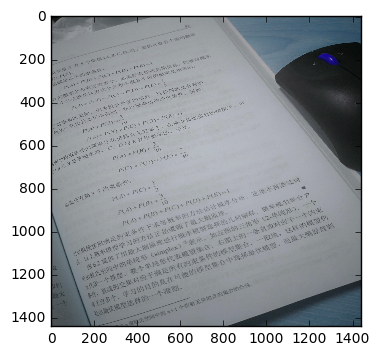

In [24]:
plt.imshow(images[0])

In [58]:
%time res = model.predict(images[0:1,:,:,:])

Wall time: 371 ms


In [59]:
res1 = res[0]
res1[res1>0.9]= 1
res1[res1<=0.9]= 0
newres1 = []
for i in range(5):
#for i in [1,2,3]:
    n = np.logical_and(res1[:,:,5],res1[:,:,i]) * 255
    newres1.append(n)
newres1.append(res1[:,:,5]*255)

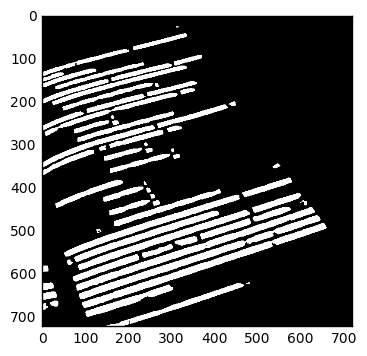

In [60]:
plt.imshow(newres1[5],cmap='gray')

In [61]:
_,regions = cv2.connectedComponents(newres1[0].astype('uint8'))

In [62]:
regions.shape

(720, 720)

In [63]:
from tool.utils import ufunc_4 , scale_expand_kernels ,fit_minarearectange,fit_boundingRect

Wall time: 129 ms
Wall time: 118 ms
[array([[211,  82],
       [208,  72],
       [333,  40],
       [336,  50]], dtype=int64), array([[ 77, 116],
       [ 75, 106],
       [199,  74],
       [202,  84]], dtype=int64), array([[306, 117],
       [303, 107],
       [368,  89],
       [371, 100]], dtype=int64), array([[  0, 141],
       [ -2, 131],
       [ 75, 106],
       [ 78, 116]], dtype=int64), array([[ 31, 173],
       [ 28, 162],
       [233, 105],
       [236, 116]], dtype=int64), array([[161, 153],
       [158, 142],
       [298, 108],
       [300, 119]], dtype=int64), array([[ 24, 208],
       [ 20, 195],
       [331, 110],
       [335, 123]], dtype=int64), array([[  0, 168],
       [ -2, 156],
       [122, 118],
       [125, 130]], dtype=int64), array([[  1, 154],
       [ -1, 144],
       [ 48, 128],
       [ 51, 137]], dtype=int64), array([[  0, 205],
       [ -3, 192],
       [150, 142],
       [154, 155]], dtype=int64), array([[244, 189],
       [242, 178],
       [352, 15

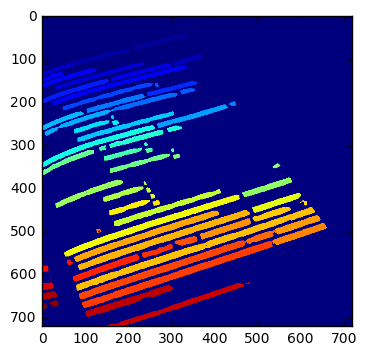

In [64]:
%time num_label,labelimage = scale_expand_kernels(newres1)
%time rects = fit_minarearectange(num_label,labelimage)
plt.imshow(labelimage)
print(rects)

In [65]:
labelimage[90,50]

0

In [66]:
imagetest = np.copy(images[0])
cv2.drawContours(imagetest,np.array(rects)*2,-1,(0,0,255),2)

array([[[27, 23, 21],
        [20, 18, 16],
        [19, 17, 16],
        ...,
        [48, 77, 92],
        [50, 79, 94],
        [52, 78, 94]],

       [[20, 20, 18],
        [22, 22, 20],
        [22, 23, 21],
        ...,
        [44, 74, 89],
        [45, 75, 90],
        [50, 79, 94]],

       [[21, 24, 22],
        [20, 23, 21],
        [20, 23, 21],
        ...,
        [47, 77, 92],
        [43, 74, 89],
        [43, 74, 89]],

       ...,

       [[74, 78, 79],
        [74, 78, 79],
        [73, 78, 79],
        ...,
        [47, 73, 87],
        [48, 74, 86],
        [49, 75, 87]],

       [[72, 76, 78],
        [72, 75, 77],
        [72, 77, 78],
        ...,
        [45, 71, 83],
        [47, 73, 85],
        [47, 74, 85]],

       [[73, 77, 79],
        [73, 77, 77],
        [70, 75, 76],
        ...,
        [47, 73, 85],
        [47, 73, 85],
        [45, 73, 84]]], dtype=uint8)

True

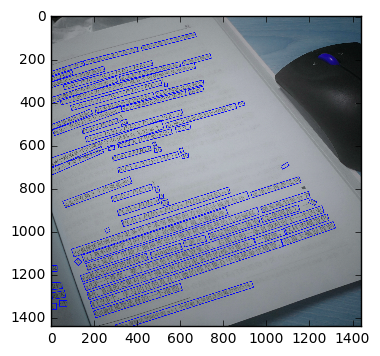

In [44]:
plt.imshow(imagetest)
cv2.imwrite('test2.jpg',imagetest)

In [108]:
h = r'E:\psenet-MTWI\document\mtwi_2018_task2_test\icpr_mtwi_task2\image_test\LB1gXi2JVXXXXXUXFXXXXXXXXXX.jpg'
images=cv2.imdecode(np.fromfile(h,dtype=np.uint8),-1) 
#images=cv2.cvtColor(images,cv2.COLOR_RGB2BGR)
cv2.imwrite(r'E:\tmp.jpg',images)

True

In [109]:
## todo
* 大概有100张图片没读出来 Y
* 把评测代码加上       
* 换backone
* 弧形文本行
* 强交叉文本行
* 误检太多

SyntaxError: invalid syntax (<ipython-input-109-adbc9f38b16f>, line 2)